In [1]:
import gzip
import pickle
import numpy as np
import pandas as pd
import os, sys
import seaborn as sns
import matplotlib.pyplot as plt
sys.path.append("../src/")
from convertor import convert
from preprocessing import get_target, preprocessing
from numpy.linalg import norm

In [2]:
plant_list = [
    "A.thaliana",
    "C.sinensis",
    "G.max",
    "G.raimondii",
    "M.truncatula",
    "O.sativa",
    "S.bicolor",
    "T.aestivum",
    "Z.mays"
]

In [3]:
data = []
for plant in plant_list:
    pos = pd.read_csv(f'../experiment/{plant}/positive/Result/result_level1_filter.csv')
    data.append(pos)        
    neg = pd.read_csv(f'../experiment/{plant}/negative/Result/result_level1_filter.csv')
    data.append(neg)        
data = pd.concat(data)
data.shape

(62007, 183)

In [4]:
data = convert(data)
[features, mu, std]  = preprocessing(data, None, None, True)

/home/jupyter/Ilia/amir-p3/jupyter_ipynbs/../src/preprocessing.py:229: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[c].replace([np.inf], m, inplace=True)


In [6]:
corr_matrix = features.corr()

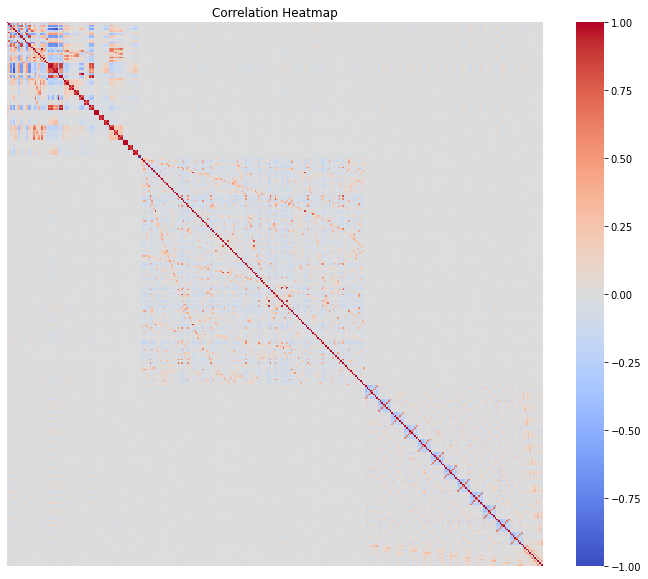

In [8]:
# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix,
            cmap='coolwarm',
            annot=False,
            cbar=True,
            fmt=".2f",
            linewidths=0,
            linecolor='black',
            square=False,
            xticklabels=False,
            yticklabels=False,
            mask=None,
            ax=None,
            center=None,
            vmin=None,
            vmax=None,
            annot_kws=None,
            cbar_kws=None)

plt.title('Correlation Heatmap')
plt.xlabel('')
plt.ylabel('')

plt.show()


In [10]:
features

,hit len,flanking GC content,flanking MFEI,hit GC content,hit complementarity percentage,num of linking residues,boi GC content,boi delta G,boi AMFE,boi MFEI,...,connectivity hit start-2,connectivity hit end-2,connectivity hit start-1,connectivity hit end-1,connectivity hit start,connectivity hit end,connectivity hit start+1,connectivity hit end+1,connectivity hit start+2,connectivity hit end+2
0,-0.393586,-0.656432,0.915890,0.213830,1.137939,0.012031,-0.536283,-0.193246,0.242183,0.494460,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,-0.393586,-0.656432,0.915890,0.213830,1.137939,0.012031,-0.536283,-0.193246,0.242183,0.494460,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,-0.393586,-0.656432,0.915890,0.213830,1.137939,0.012031,-0.536283,-0.193246,0.242183,0.494460,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,-0.393586,-0.656432,0.915890,0.213830,1.137939,0.012031,-0.536283,-0.193246,0.242183,0.494460,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,-0.393586,-0.656432,0.915890,0.213830,1.137939,0.012031,-0.536283,-0.193246,0.242183,0.494460,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62002,-0.393586,-1.042806,-0.304831,-0.675912,0.126369,0.460266,-1.031545,0.617511,-0.995837,-0.392990,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
62003,0.289513,-0.038234,-0.175033,0.086724,0.179610,0.028039,0.171233,0.226136,0.264179,-0.019024,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
62004,-0.393586,-1.120081,-0.692684,-2.201184,-0.352795,-0.852422,-1.031545,1.063576,-1.102538,-0.518474,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
62005,0.289513,-0.192784,-0.502087,-0.803018,-1.524086,-0.692338,-0.253277,0.685295,-0.752743,-0.618036,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
